<a href="https://colab.research.google.com/github/nathaliacastelobranco/NLP-python-infnet/blob/main/Aula_02_(Processamento_de_linguagem_natural_INFNET)_Parsing_R_Bloggers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parsing R-Bloggers

The main objective of this code is parsing HTML code from R-Bloggers and plot a wordcloud.

In [24]:
# libs
import requests
from bs4 import BeautifulSoup
import nltk
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from os import path

%matplotlib inline

In [2]:
# request title`s text function

def get_titles_r_bloggers(page):
  url = f"https://www.r-bloggers.com/page/{page}/"
  print(f"Downloading {url}")
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')
  
  titles = []
  h3_list = soup.find_all('h3')
  for h3 in h3_list:
    titles.append(h3.text)
  return titles

In [3]:
# requering 2 pages from R-Bloggers

titles = []
for page in range(1,3):
  titles.extend(get_titles_r_bloggers(page))

In [4]:
# pre-processing titles
titles = [t.lower() for t in titles]

### Creating a wordcloud from obtained words

In [11]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
# creating a tokenizer function
def get_words(text):
  text =text.lower().strip()
  tokens = nltk.word_tokenize(text)

  words = [token for token in tokens if token.isalpha()]
  return ' '.join(words)

In [13]:
# applying tokenizer function
titles = [get_words(t) for t in titles]

In [15]:
# defining stopwords in english
stopwords_en = nltk.corpus.stopwords.words('english')

In [85]:
# creating mask and color mask
brain_coloring = np.array(Image.open('vivid-colors.png'))
mask_brain =np.array(Image.open('brain-mask-white.png'))
mask_nlp =np.array(Image.open('nlp-mask-white.png'))

(-0.5, 599.5, 449.5, -0.5)

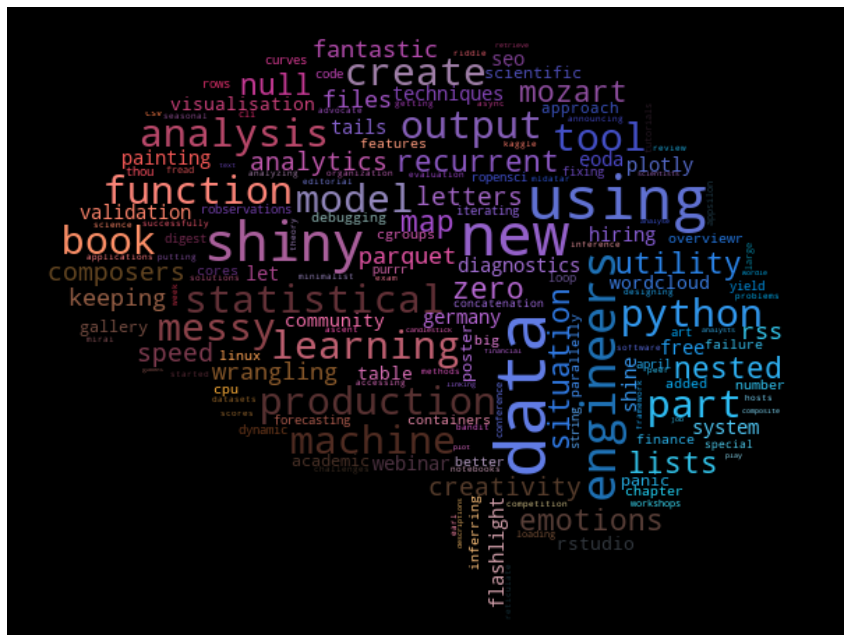

In [98]:
# create coloring from image
image_colors = ImageColorGenerator(brain_coloring)

# plotting the wordcloud
fig, ax = plt.subplots(1, 1, figsize=(15,15))
wordcloud = WordCloud(stopwords=stopwords_en,
                      height=2000,
                      width=2000,
                      background_color='black',
                      mask=mask_brain,
                      max_font_size=50).generate(' '.join(titles))

ax.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
ax.axis('off')